| Metric       | Decision Tree | KNN  | Random Forest | Neural Network |
|--------------|---------------|------|---------------|----------------|
| Accuracy     | 0.000         | 0.000| 0.831         | 0.805          |
| F1-Score     | 0.000         | 0.000| 0.421         | 0.441          |
| AUC          | 0.000         | 0.000| 0.789         | 0.747          |

/Users/I750363/Library/Python/3.13/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Calculating SHAP values...
Generating Summary Plot for Class 1...


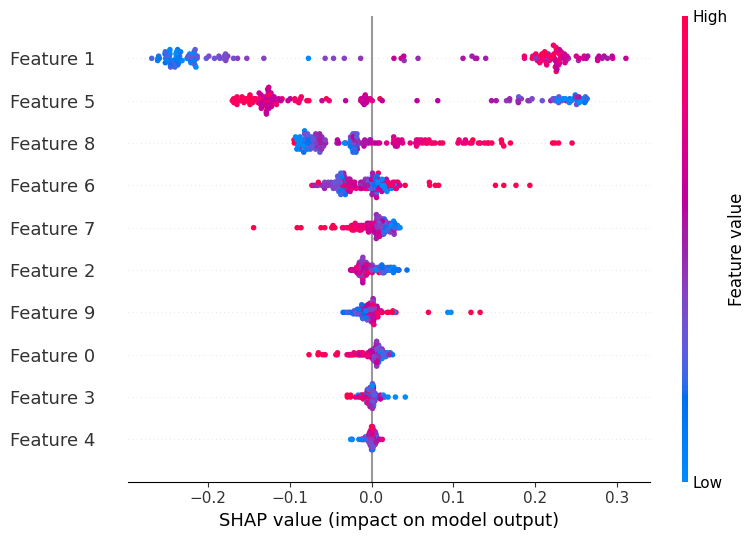

Generating Dependence Plot for 'Feature 0' (Class 1)...


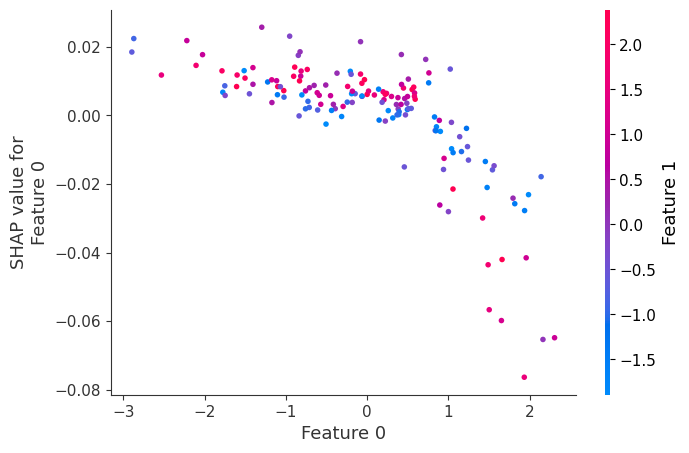

In [ ]:

import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd

# Generate synthetic data
X, y = make_classification(n_samples=500, n_features=10, random_state=42)

# Convert to DataFrame (this is good practice and matches your project)
feature_names_list = [f"Feature {i}" for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names_list)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- FIX 1: Use shap.Explainer (the modern way) ---
# This handles TreeExplainer, etc., automatically
explainer = shap.Explainer(rf_model)

# --- FIX 2: Call the explainer object directly ---
# This returns a richer "Explanation" object
print("Calculating SHAP values...")
shap_explanation = explainer(X_test)

# shap_explanation.values now has a 3D shape: (n_samples, n_features, n_classes)
# We want to plot for Class 1 ("At-Risk")

# Summary plot (global feature importance)
print("Generating Summary Plot for Class 1...")
# We select the values for class 1 using [:,:,1]
shap.summary_plot(shap_explanation.values[:,:,1], X_test)


# Dependence plot for a specific feature
print("Generating Dependence Plot for 'Feature 0' (Class 1)...")
# We use the feature name "Feature 0" and the class 1 values
# The `shap_explanation[:, "Feature 0", 1]` syntax is the cleanest way
shap.dependence_plot(
    "Feature 0", 
    shap_explanation.values[:,:,1], 
    X_test,
    interaction_index="auto" # This is the default, but good to be explicit
)